# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset

In [2]:
dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Data preprocessing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
print('Number of persons analysed :', dataset.shape[0])
print('Number of factors :', dataset.shape[1])

Number of persons analysed : 253680
Number of factors : 22


## Check data imbalance

In [5]:
print('Number of unique values present to identify diabetes')
print(dataset['Diabetes_012'].value_counts())

Number of unique values present to identify diabetes
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


## Downsampling

In [6]:
downsampled_data = dataset.groupby('Diabetes_012').apply(lambda x: x.sample(4631))

In [7]:
print(downsampled_data)

                     Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  \
Diabetes_012                                                                   
0.0          84457            0.0     0.0       1.0        1.0  30.0     1.0   
             188109           0.0     0.0       0.0        1.0  25.0     1.0   
             97589            0.0     0.0       1.0        1.0  26.0     1.0   
             113793           0.0     0.0       0.0        1.0  26.0     1.0   
             114806           0.0     0.0       0.0        1.0  28.0     0.0   
...                           ...     ...       ...        ...   ...     ...   
2.0          240284           2.0     1.0       1.0        1.0  25.0     1.0   
             16805            2.0     1.0       1.0        1.0  27.0     0.0   
             221165           2.0     0.0       1.0        1.0  24.0     1.0   
             126761           2.0     1.0       1.0        1.0  27.0     1.0   
             155921           2.0     1.

In [8]:
downsampled_data = downsampled_data.reset_index(drop=True)

In [9]:
print(downsampled_data)

       Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0               0.0     0.0       1.0        1.0  30.0     1.0     0.0   
1               0.0     0.0       0.0        1.0  25.0     1.0     0.0   
2               0.0     0.0       1.0        1.0  26.0     1.0     0.0   
3               0.0     0.0       0.0        1.0  26.0     1.0     0.0   
4               0.0     0.0       0.0        1.0  28.0     0.0     0.0   
...             ...     ...       ...        ...   ...     ...     ...   
13888           2.0     1.0       1.0        1.0  25.0     1.0     0.0   
13889           2.0     1.0       1.0        1.0  27.0     0.0     0.0   
13890           2.0     0.0       1.0        1.0  24.0     1.0     1.0   
13891           2.0     1.0       1.0        1.0  27.0     1.0     0.0   
13892           2.0     1.0       1.0        1.0  33.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           

In [10]:
print(downsampled_data['Diabetes_012'].value_counts())

Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


# Classification

## Data split

In [11]:
X = downsampled_data.iloc[:, 1:]
y = downsampled_data.iloc[:, 0]

In [12]:
print(X)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0         0.0       1.0        1.0  30.0     1.0     0.0   
1         0.0       0.0        1.0  25.0     1.0     0.0   
2         0.0       1.0        1.0  26.0     1.0     0.0   
3         0.0       0.0        1.0  26.0     1.0     0.0   
4         0.0       0.0        1.0  28.0     0.0     0.0   
...       ...       ...        ...   ...     ...     ...   
13888     1.0       1.0        1.0  25.0     1.0     0.0   
13889     1.0       1.0        1.0  27.0     0.0     0.0   
13890     0.0       1.0        1.0  24.0     1.0     1.0   
13891     1.0       1.0        1.0  27.0     1.0     0.0   
13892     1.0       1.0        1.0  33.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       0.0           1.0     1.0      1.0  ...   
1                       0.0           1.0     0.0      1.0  ...   
2                       0.0           1.0     1.0      1.0  ...   
3          

In [13]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13888    2.0
13889    2.0
13890    2.0
13891    2.0
13892    2.0
Name: Diabetes_012, Length: 13893, dtype: float64


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
print(X_train)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5753      1.0       0.0        1.0  31.0     0.0     0.0   
9135      0.0       0.0        1.0  31.0     0.0     0.0   
9381      1.0       1.0        1.0  39.0     1.0     0.0   
12965     0.0       0.0        1.0  30.0     1.0     0.0   
6681      1.0       1.0        1.0  31.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
13123     1.0       1.0        1.0  23.0     0.0     0.0   
3264      0.0       1.0        1.0  43.0     0.0     0.0   
9845      0.0       1.0        1.0  24.0     0.0     0.0   
10799     1.0       1.0        1.0  30.0     0.0     0.0   
2732      0.0       0.0        1.0  24.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
5753                    0.0           1.0     0.0      1.0  ...   
9135                    0.0           0.0     1.0      1.0  ...   
9381                    0.0           0.0     0.0      1.0  ...   
12965      

In [16]:
print(y_train)

5753     1.0
9135     1.0
9381     2.0
12965    2.0
6681     1.0
        ... 
13123    2.0
3264     0.0
9845     2.0
10799    2.0
2732     0.0
Name: Diabetes_012, Length: 11114, dtype: float64


In [17]:
print(X_test)

      HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
2818     1.0       0.0        1.0  25.0     0.0     0.0                   0.0   
9003     1.0       1.0        1.0  26.0     0.0     0.0                   1.0   
6481     1.0       1.0        1.0  32.0     1.0     1.0                   0.0   
5193     0.0       1.0        1.0  25.0     0.0     0.0                   1.0   
7028     1.0       0.0        1.0  46.0     0.0     0.0                   0.0   
...      ...       ...        ...   ...     ...     ...                   ...   
8133     1.0       1.0        1.0  33.0     1.0     0.0                   0.0   
6978     1.0       0.0        1.0  36.0     0.0     0.0                   0.0   
8783     1.0       1.0        1.0  27.0     0.0     0.0                   0.0   
6789     1.0       1.0        1.0  30.0     0.0     0.0                   0.0   
6878     0.0       0.0        1.0  25.0     0.0     0.0                   0.0   

      PhysActivity  Fruits 

In [18]:
print(y_test)

2818    0.0
9003    1.0
6481    1.0
5193    1.0
7028    1.0
       ... 
8133    1.0
6978    1.0
8783    1.0
6789    1.0
6878    1.0
Name: Diabetes_012, Length: 2779, dtype: float64


# Logistic regression classification

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\prade\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

# Predict test result

In [20]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[593 142 149]
 [273 265 387]
 [164 254 552]]


0.5073767542281397

# Data visualisation

Text(0.5, 1.0, 'Confusion Matrix')

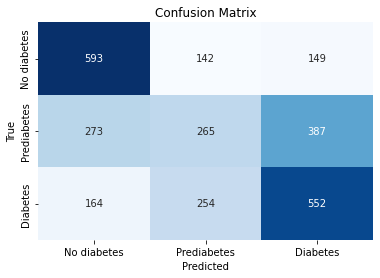

In [22]:
custom_labels = ['No diabetes', 'Prediabetes', 'Diabetes']
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Feature ranking

In [28]:
coefficients = classifier.coef_[0]
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_ranking = feature_ranking.sort_values(by='Coefficient', ascending=False)
print(feature_ranking)

                 Feature  Coefficient
11         AnyHealthcare     0.407119
2              CholCheck     0.305413
7           PhysActivity     0.196241
10     HvyAlcoholConsump     0.179414
4                 Smoker     0.147283
9                Veggies     0.146034
19             Education     0.115763
20                Income     0.064503
5                 Stroke     0.032611
8                 Fruits     0.020850
12           NoDocbcCost     0.010350
15              PhysHlth     0.002421
14              MentHlth     0.000958
3                    BMI    -0.029912
16              DiffWalk    -0.052839
18                   Age    -0.062883
6   HeartDiseaseorAttack    -0.144542
17                   Sex    -0.147583
13               GenHlth    -0.224187
0                 HighBP    -0.522663
1               HighChol    -0.571680


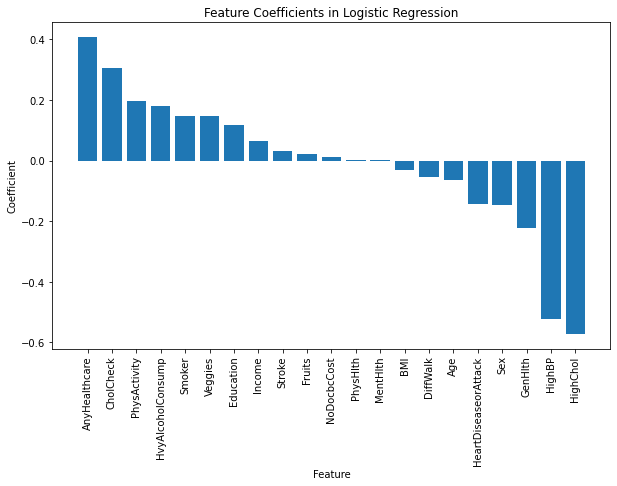

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(feature_ranking['Feature'], feature_ranking['Coefficient'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients in Logistic Regression')
plt.show()